# <div align="center">Level 1. Titanic: Machine Learning form Disaster</div>
## <div align="center">1. Titanic tutorial</div>
### <div align="center"> 제작자 : 김규동 </div>
### <div align="center"> 제작 시작 : 2019. 10. 15. 08:00 PM <br> 최종 수정 : 2019. 10. 16. 20:20 PM</div>

-----------------------------------------------------------------------------------------------------------
<a id="0"></a> <br>
# 목차
1. [Intro](#1)
    1. [캐글(Kaggle)](#1)
    1. [데이터 과학(Data Science)](#2)
1. [문제 정의, 데이터 수집](#3)
    1. [문제 정의](#3)
    1. [기획](#4)
    1. [데이터 수집](#5)
1. [데이터 전처리(Wrangling)](#6)
    1. [기본 패키지 호출](#7)
    1. [모델링 전용 패키지 호출](#8)
    1. [데이터 살펴보기](#9)
    1. [Completing - null값 확인, 교정](#10)
    1. [Creating - 주요 특징이 되는 값 추출](#11)
1. [데이터 분석 및 시각화](#12)
    1. [Survived(Target Label)](#13)
    1. [Pclass](#14)
    1. [Sex](#15)
    1. [Age](#16)
    1. [Embarked](#17)
    1. [FamilySize](#18)
    1. [Fare](#19)
    1. [각 변수별 상관관계 분석](#20)
1. [데이터 모델링](#21)
    1. [훈련 데이터, 테스트 데이터, 검증 데이터 분리](#22)
    1. [모델링 - 랜덤포레스트](#23)
1. [검증, submission](#24)

<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="1"></a> <br>

# 1. Intro

본인은 아래 블로그들을 참고해 이 글을 작성했다.<br>
https://blog.naver.com/nilsine11202/221423674778<br>
https://kaggle-kr.tistory.com/17

## 1-1. 캐글(Kaggle)
데이터 사이언스 경진 대회 플랫폼.
데이터 사이언스를 하는 사람들 사이에서는 <font color="red">배틀로얄, 배틀그라운드, 쇼미더머니, 고등래퍼</font> 같은 존재다. 왜??
- 하나의 거대한 커뮤니티와도 같은 곳이기 때문에 사람도 많고, 그래서 주무를 데이터도 많다.
- 사람이 많은 만큼 각자 다른 분석을 했고, 각자 다른 코드를 가진다. 그들의 코드를 보며 많은 것을 배울 수 있다.

하지만 다음과 같은 이유로 초보자가 다루기에는 힘들다.
- 외국 사이트이기 때문에 <font color="red">영어가 많다.</font>
- 파이썬과 R 등 분석도구의 환경에 익숙해야 한다.
- 지금 사용중인 환경은 Jupyter Notebook으로, 이를 활용할 줄 알아야 한다.

하지만 우리는 이미 데이터 사이언스를 많이 해본 사람들.
아래의 조건이 모두 충족된다는 가정을 전제로 이 입문서를 시작하도록 하자.
- 파이썬과 R의 문법을 이미 알고 있다.
- 각종 개발 도구로 데이터를 다룰 수 있다.
- 구글링을 어떻게 하는지 잘 알고 있다.

<div align="right">[목차로](#0)</div>
<a id="2"></a>
## 1-2. 데이터 과학(Data Science)
> 데이터 과학자들은 어떻게 문제를 해결할까?

우리는 주어진 데이터로서 미래를 예측하거나 상황을 분석하는 등 다양한 문제를 해결하고자 한다.
<br>문제 해결을 위해 우리가 할 일반적인 순서는 다음과 같다.

### 문제 해결 순서
1. 문제 정의(Define)<br>
2. 데이터 수집(Collect)<br>
3. 데이터 전처리(Preprocess) -> 랭글링(Wrangling)<br>
4. 데이터 분석(Analysis) 및 시각화(Visualizing)<br>
5. 데이터 모델링(Modeling)<br>
6. 검증(Verification), 최적화(Optimization)<br>


일반적인 방법인 만큼, 모든 데이터 사이언스의 순서가 이렇게 된다고 봐도 무방하다.

이제, 캐글의 입문용 컴피티션인 <font color="red">"타이타닉(Titanic) : 재앙으로부터의 머신러닝"</font>으로 위 순서에 맞게 학습을 시작해보자.

<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="3"></a> <br>
# 2. 문제 정의, 데이터 수집

### 2-1. 문제 정의
여기서 프로젝트의 목표는 이미 제시되었다.

> <font color="green">"타이타닉의 승객 데이터를 활용해, 생존할 사람을 예측하는 알고리즘을 개발하시오."</font>

아래는 Titanic 프로젝트의 요약본이다.

> 타이타닉의 침몰은 역사상 가장 악명높은 침몰 사고 중 하나입니다.<br><br>
1912년 4월 15일, 타이타닉은 최초 항해 도중 빙하와 충돌해 침몰하며 2224명의 승객과 선원 중 1502명의 사망자를 냈습니다.<br>
이 끔찍한 비극은 전 세계를 충격에 빠뜨렸죠. 결국 선박에 대한 더 나은 안전 규정을 갖추게 하는 시발점이 되기도 했습니다. 난파 사고가 그토록 많은 인명 피해가 났던 이유 중 하나는 배 위에 승객과 선원을 위한 충분한 구명보트가 없었기 때문이었습니다.<br>
생존에는 종종 운이 따르기도 했지만, 여성과 아이, 상위계급을 비롯한 몇 그룹은 생존률이 더욱 높았습니다.<br><br>
이 챌린지에서는, 어떤 종류의 사람이 더 생존할 가능성이 높았는지를 묻습니다.<br>
특히, 머신러닝 툴을 사용하여 어떤 승객이 생존했는지를 예측해주세요.

이 단계는 우리가 데이터 사이언스를 하기 위한 가장 근본적인 단계다.

<div align="right">[목차로](#0)</div>
<a id="4"></a> <br>
### 2-2. 기획
대단원으로는 "문제 정의, 데이터 수집" 이라고 적혀있으면서 왜 이 소단원의 제목은 "기획" 이냐?<br>

어떠한 프로젝트가 생겼다고 가정하자. 그럼 무작정 데이터부터 수집할 것인가? 아니다!
> 일단 어떤 문제인지 파악하고, 그 문제를 어떻게 해결하면 좋을지 미래의 그림을 그려야 한다.

사실 이 단계는 <font color="red">"문제 정의"의 연장 단계</font>라고 생각하면 된다.<br>
굳이 기획 단계를 넣는 이유는, 문제가 발생했으면 문제 해결을 위한 밑작업을 하는 것이 매우 중요하기 때문이다.<br>
마치 건축가가 집을 지어달라는 요청을 받았을 때 무작정 바닥을 까는 것이 아니라 <font color="red">도안을 그리는 것</font>과도 같다.

<div align="right">[목차로](#0)</div>
<a id="5"></a> <br>
### 2-3. 데이터 수집
사실 이 프로젝트는 데이터를 제공하기 때문에 이 단계도 스킵한다. <br>
이제, 어떤 도구로 다음 과정을 넘어갈지 선택해야 하는데, 이에 따른 2가지 방법을 설명한다.<br><br><br>

<font color="red" size=4>a. 직접 다운로드 받아 본인의 분석 도구로 분석하기</font><br>

데이터 다운로드 주소는 아래와 같다.

https://www.kaggle.com/c/titanic/data

여기서 Data 항목에 download all 을 클릭하면 아래 3개의 파일이 다운로드된다.
- gender_submission.csv
- test.csv
- train.csv

이후 자신의 도구에 데이터를 불러오면 된다.

<br><br>
<font color="red" size=4>b. 캐글의 주피터 노트북 이용하기</font><br>

캐글에서는 자체적인 주피터 노트북 커널을 생성할 수 있다.

https://www.kaggle.com/[본인의아이디]/kernels

캐글에 로그인 된 상태에서 위 주소로 들어가면 자신의 작업물이 나타나게 된다.<br>
New Notebook 을 누른다면 주피터 노트북과 같은 UI가 나타나게 되는데,<br>
우측 상단에 Add Data 버튼을 누른 후 Competition Data를 들어가면 맨 위에 Titanic이 있을 것이다.<br>
Add 버튼을 누르면 커널에 데이터가 들어가게 될 것이다.<br><br><br><br>

데이터가 잘 들어왔는지 확인해보자.

In [1]:
# import packages
import pandas as pd

In [2]:
# data read
gen_sub = pd.read_csv("../input/titanic/gender_submission.csv")
gen_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
train = pd.read_csv("../input/titanic/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test = pd.read_csv("../input/titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="6"></a> <br>
# 3. 데이터 전처리(Wrangling)
위에서 데이터가 잘 있는지(?)를 확인했다.
이제 데이터를 전처리하는 단계이다.

시작 전 참고할 사항
> 일반적으로 전처리는 preprocessing라는 단어를 쓰지만,<br>
데이터 분야에선 data wrangling, munging, cleaning 등으로 다양하게 사용된다.<br>
우리는 좀 전문적으로 랭글링 이라고 표현하자.(ㅋㅋ)


<font color="red">데이터 전처리는 4C가 중요하다.</font><br><br>
<font size=4>
- Correcting (이상한 값이나 특이한 값, 납득할 수 없는 값[이상치] 교정)<br>
- Completing (결측값 교정)<br>
- Creating (주요 특징이 되는 값 추출)<br>
- Converting (형식 처리)</font><br>

우리는 이러한 과정을 Feature Engineering이라고 한다.

<font color="red">이제 우리가 가지고 놀 데이터가 어떤 데이터인지 확인할 필요가 있다.</font><br>
시작 전, 패키지 호출을 하자.

<div align="right">[목차로](#0)</div>
<a id="7"></a> <br>
### 3-1. 기본 패키지 호출
패키지 호출 시에는 어떤 패키지를 사용할까 하고 패키지를 먼저 생각하기 보다는,<br>
어떤 코드를 입력해야할까 고민한 후 때에 맞춰 패키지를 호출하면 된다.

패키지 호출 방법은 위에서 pandas 패키지 호출하듯이 하면 된다.<br>
pandas 패키지를 제외하고 필요한 패키지들을 호출하자.<br>
만약, 없는 패키지가 있다면 미리 다운로드 해두자.

참고로 커널은 파이썬 3.6버전을 사용하며, 분석에 용이한 상당히 많은 패키지를 포함하고 있다.

In [5]:
import sys
# import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import sklearn

# 버전 체크
print("Python version: {}". format(sys.version))
print("pandas version: {}". format(pd.__version__))
print("NumPy version: {}". format(np.__version__))
print("SciPy version: {}". format(sp.__version__)) 
print("matplotlib version: {}". format(matplotlib.__version__))
print("scikit-learn version: {}". format(sklearn.__version__))

# 보조 라이브러리
import random
import time

import warnings # 오류 무시
warnings.filterwarnings("ignore")


print("-"*25)

Python version: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
pandas version: 0.25.1
NumPy version: 1.16.4
SciPy version: 1.2.1
matplotlib version: 3.0.3
scikit-learn version: 0.21.3
-------------------------


<div align="right">[목차로](#0)</div>
<a id="8"></a> <br>
### 3-2. 모델링 전용 패키지 호출

In [6]:
#흔히 사용되는 모델 알고리즘
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#흔히 쓰이는 모델 보조 툴들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix
# 이건 왜 안될까?

#시각화 기본값 설정
#%matplotlib inline = 그림을 주피터 노트북 내부에서 띄울 수 있도록 설정해주는 코드
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
plt.style.use('seaborn')
sns.set(font_scale=2.5)
pylab.rcParams['figure.figsize'] = 12,8

<div align="right">[목차로](#0)</div>
<a id="9"></a> <br>
### 3-3. 데이터 살펴보기
파트 2-3에서 데이터를 불러들였다. 데이터 목록을 다시 보자.
- gen_sub(gender_submission.csv)
- test(test.csv)
- train(train.csv)

In [7]:
gen_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


총괄적으로 1309명의 승객 데이터를 다루고 있다.<br>
train 데이터를 먼저 보면 다음 변수들이 있다.
- PassengerId : 승객의 고유번호. sql로 치면 Primary Key가 되겠다. 총 1039명이지만, train 데이터에는 891명(전체의 약 68%)을 뽑았다.
- Survived : 생존 여부을 나타내는 질적 변수로, 살았다면 1, 그렇지 못하면 0이다.
- Pclass : 티켓에 대한 계급을 나타내는 질적 변수로, 상위 계급일수록 1에 가깝다.
- Name : 승객의 이름.
- Sex : 승객의 성별.
- Age : 승객의 나이.
- SibSp : 함께 탑승한 친척/배우자의 수
- Parch : 함께 탑승한 가족/아이의 수
- Ticket : 승객의 티켓 번호로, PassengerId와 같이 고유 식별자가 되겠다.
- Fare : 탑승 시 지불한 비용. 탑승료.
- Cabin : 배 위에서의 대략적인 위치를 나타내는 변수. null값이 많다는 점에 유의.
- Embarked : 탑승 시 입항한 항구. C = Cherbourg, Q = Queenstown, S = Southampton

test 데이터에는 PassengerId가 892번부터 1309번까지 있으며, Survived 변수가 빠져있다.

gen_sub는 승객번호가 892번부터 1309번까지 있고 Survived 변수만 있는 것으로 보아,<br>
추후 test 데이터를 train 데이터로 러닝시켜 예측한 결과와 비교해보기 위한 수단으로 보인다.<br>
<font color="red">다시 말해, gen_sub는 검증 전까지는 사용하지 말자.</font>

<div align="right">[목차로](#0)</div>
<a id="10"></a> <br>
### 3-4. Completing - null값 확인, 교정
이제 본격적으로 Feature Engineering을 시작하자.<br>
가지고 있는 데이터에 null값은 얼마나 있는지, 프로젝트의 목표가 되는 종속변수(target label)는 어떤 분포를 이루는지 먼저 살펴볼 것이다.

먼저, train과 test에 대한 null값을 확인해보자.<br>
만약 null 값이 많다면 위험한 데이터가 될 수 있다.

In [10]:
# train 데이터 null 값 확인

for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [11]:
# test 데이터 null 값 확인

for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


이번엔 missingno 라는 라이브러리를 사용해 null data의 존재를 더 쉽게 보자.

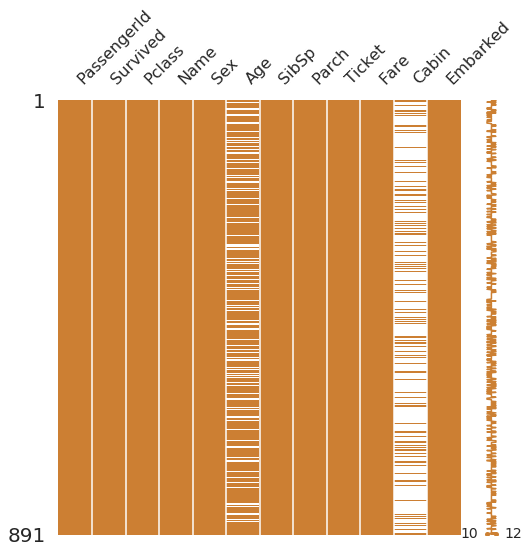

In [12]:
# missingno 라이브러리 호출
import missingno as msno

msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

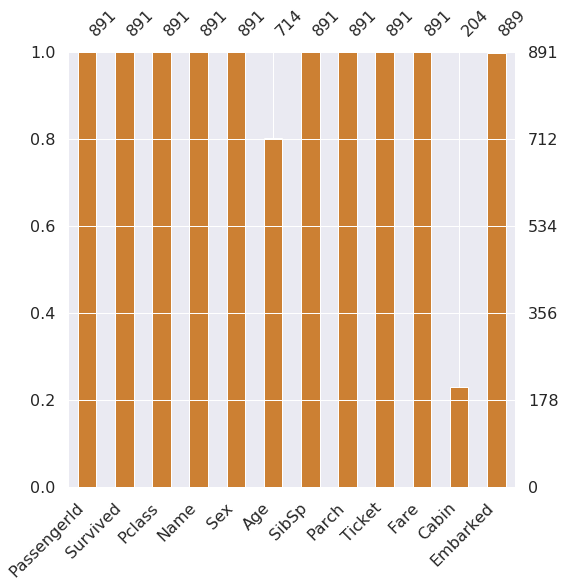

In [13]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

전체적으로 <font color="red">Cabin</font>와 <font color="red">Age</font> 변수에 많은 결측값이 있고,<br>
train에는 <font color="red">Embarked</font>, test에는 <font color="red">Fare</font>에 약간의 결측값이 있음을 확인했다.

결측치를 해결하는 방법에는 2가지가 있다.
- 삭제(권장 x, 자료 대부분이 결측치거나 자체가 필요 없는 변수일 때 사용)
- 수정(다른 값에 근거하여 채워 넣기)

정성 데이터를 위한 기본적인 방법으로는 <font color="red">최빈값</font>을 넣는 것이다.<br>
정량 데이터를 위한 기본적인 방법은 <font color="red">평균 or 중앙 or 평균+무작위 표준편차</font>를 넣는 것이다.<br>
타협적인 방법으로는, 특정 기준에 근거하여 기본적인 방법론을 적용하는 것이다.<br>
(예 : 계층에 따른 평균 연령, 승선 항구에 따른 운임이나 계급)<br>

물론 더 복잡한 방법들도 있는데, 이러한 것들을 나열하기 전에 기본적인 모델들(앞서 다뤄온 기본적인 방법론들)에 비해 굳이 복잡하게 할만한 가치가 있냐를 고려해야 한다.

이번 글에서는 타협적인 방법을 주로 사용하는데, 아래와 같은 Completing 과정을 진행한다.
- Age => 남자와 여자의 initial을 구분해 평균값으로 대체
- Embarked => 최빈값(S가 제일 많음)으로 대체

이 외에도 다른 결정을 진행할 것이다.<br>
참고로 모델의 정확도 개선을 위해 이 결정은 수정될 수도 있다.


먼저 <font color="red">Age부터 Completing하자.</font>

In [14]:
train['Initial']= train.Name.str.extract('([A-Za-z]+)\.')
    
test['Initial']= test.Name.str.extract('([A-Za-z]+)\.')

# Checking the Initials with the Sex
pd.crosstab(train['Initial'], train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
# 위 결과에 근거하여 이름을 수정하자.

train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [16]:
# 각 이니셜 별 평균값 확인
train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


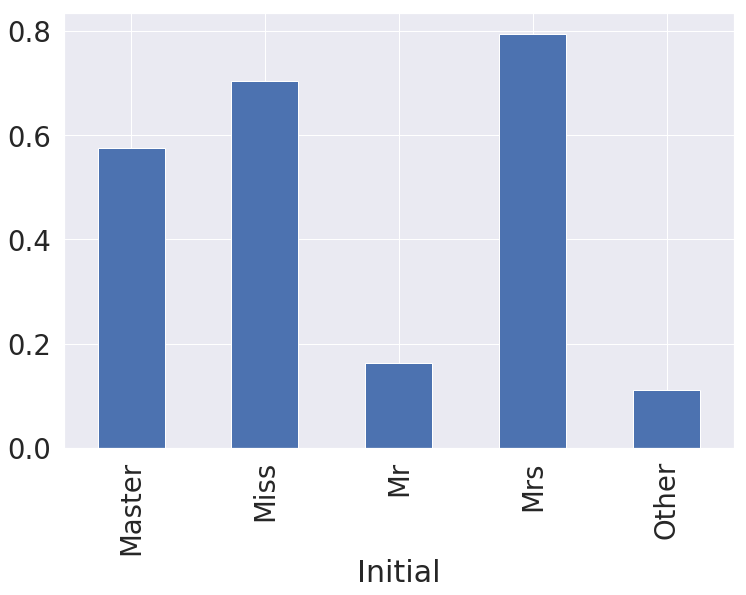

In [17]:
train.groupby('Initial')['Survived'].mean().plot.bar()

이제 Age의 평균을 이용해 결측값을 채운다.

loc, boolean, column을 사용해 값을 치환할 것이다.

In [18]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age'] = 33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age'] = 5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age'] = 22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age'] = 46

test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age'] = 33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age'] = 36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age'] = 5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age'] = 46

그 다음, <font color="red">Embarked를 Completing하자.</font>

In [19]:
print('Embarked has ', sum(train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [20]:
# Embarked에는 2개의 결측값만 있다.
# S에 가장 많은 탑승객이 있으므로 간단하게 S로 채우도록 하자.
train['Embarked'].fillna('S', inplace=True)

test 데이터에는 Fare 변수에 결측값이 있다. 이 또한 Completing하자.

In [21]:
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

<div align="right">[목차로](#0)</div>
<a id="11"></a> <br>
### 3.5 Creating - 주요 특징이 되는 값 추출

Completing 과정이 끝나면, 이제 특징 값을 추출하는 Creating 과정으로 넘어간다.<br>

SibSp와 Parch 변수를 합하면 FamilySize 라는 변수가 될 수 있다.<br>
이 작업을 먼저 진행해주자.

In [22]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 # 자신을 포함해야하니 1을 더하자.
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1 # 자신을 포함해야하니 1을 더하자.

Age 변수는 현재 양적 변수(continuous feature)로 나타나 있는데,<br>
우리는 이를 질적 변수(categorical feature)로 바꿔주는 방법을 택하기로 하자.<br>
(주의! 양적 변수를 질적 변수로 변형 시에는 정보 손실이 발생할 수 있으니 신중하게 판단해야 한다.)
그리고
변환한 Initial 변수는 Mr, Mrs, Miss, Master, Other로 나눠져 있고,<br>
Embarked 변수는 C, Q, S로 나눠져 있으며,<br>
Sex 변수도 Female, male로 이루어져 있는데, 우리는 이들을 수치화시켜주는 방법을 택하자.

먼저 Age 변수.

2가지 방법을 사용할텐데, 공부할 겸 둘을 비교해보자.

참고로 나이는 10살 간격으로 나눌 것이다.

In [23]:
# 1. loc을 사용(노가다가 많음)

train['Age_cat'] = 0
train.loc[train['Age'] < 10, 'Age_cat'] = 0
train.loc[(10 <= train['Age']) & (train['Age'] < 20), 'Age_cat'] = 1
train.loc[(20 <= train['Age']) & (train['Age'] < 30), 'Age_cat'] = 2
train.loc[(30 <= train['Age']) & (train['Age'] < 40), 'Age_cat'] = 3
train.loc[(40 <= train['Age']) & (train['Age'] < 50), 'Age_cat'] = 4
train.loc[(50 <= train['Age']) & (train['Age'] < 60), 'Age_cat'] = 5
train.loc[(60 <= train['Age']) & (train['Age'] < 70), 'Age_cat'] = 6
train.loc[70 <= train['Age'], 'Age_cat'] = 7

test['Age_cat'] = 0
test.loc[test['Age'] < 10, 'Age_cat'] = 0
test.loc[(10 <= test['Age']) & (test['Age'] < 20), 'Age_cat'] = 1
test.loc[(20 <= test['Age']) & (test['Age'] < 30), 'Age_cat'] = 2
test.loc[(30 <= test['Age']) & (test['Age'] < 40), 'Age_cat'] = 3
test.loc[(40 <= test['Age']) & (test['Age'] < 50), 'Age_cat'] = 4
test.loc[(50 <= test['Age']) & (test['Age'] < 60), 'Age_cat'] = 5
test.loc[(60 <= test['Age']) & (test['Age'] < 70), 'Age_cat'] = 6
test.loc[70 <= test['Age'], 'Age_cat'] = 7

In [24]:
# 2. 간단한 함수로 만들어 apply 메소드 활용
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
train['Age_cat_2'] = train['Age'].apply(category_age)

In [25]:
# 두 방법을 비교
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True -> ', (train['Age_cat'] == train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True ->  True


가급적 2번째 방법을 선택하는 것이 좋겠다.

이제 중복데이터는 삭제할 것인데,<br>
기존의 Age 변수는 분석을 위해 잠시 두고, 분석이 끝나면 지우도록 하자.

In [26]:
train.drop(['Age_cat_2'], axis=1, inplace=True)

그 다음, Initial, Embarked, Sex를 수치화 시키자.

In [27]:
# Initial 수치화
train['Initial'] = train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
test['Initial'] = test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [28]:
# Embarked 수치화 전, 어떤 값이 있는지 확인 먼저 해보기
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
# Embarked 수치화
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [30]:
# Sex 수치화
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

수치화가 완료되었다.

이제 One-hot encoding(원-핫 인코딩)을 활용해 카테고리를 늘려주자.

원-핫 인코딩은 수치화된 것들을 0과 1로만 구성된 벡터로 나타내는 것이다.<br>
예를 들면<br>
Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4로 이루어진 1개의 컬럼이<br>
0과 1로만 이루어진 Initial_Master, Initial_Miss, Initial_Mr, Initial_Mrs, Initial_Other<br>로 된 5개의 컬럼으로 변한다는 것이다.

Initial와 Embarked 변수는 분석을 진행한 후에 원-핫 인코딩을 하도록 하자.

다 했다.(아직 못한 것도 있긴 하지만, 분석 단계 중 모두 수행할 것이다.)

이제 필요한 칼럼만 두고 다 지우도록 하자.

우리가 필요 없는 것은 명목데이터인 PassengerId, Name, Ticket와<br>
결측값이 너무 많은 Cabin, 그리고 앞서 합친 SibSp, Parch는 간단한 분석 후 지우도록 하자.

In [31]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

In [32]:
# train 데이터 확인
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Initial,FamilySize,Age_cat
0,0,3,1,22.0,7.2500,2,2,2,2
1,1,1,0,38.0,71.2833,0,3,2,3
2,1,3,0,26.0,7.9250,2,1,1,2
3,1,1,0,35.0,53.1000,2,3,2,3
4,0,3,1,35.0,8.0500,2,2,1,3


In [33]:
# test 데이터 확인
test.head()

,Pclass,Sex,Age,Fare,Embarked,Initial,FamilySize,Age_cat
0,3,1,34.5,7.8292,1,2,1,3
1,3,0,47.0,7.0000,2,3,2,4
2,2,1,62.0,9.6875,1,2,1,6
3,3,1,27.0,8.6625,2,2,1,2
4,3,0,22.0,12.2875,2,3,3,2


번외로, Converting(형식 처리)는 굳이 필요 없는 단계이지만 필요한 경우 진행해주자.

<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="12"></a> <br>
# 4. 데이터 분석 및 시각화
데이터 랭글링이 깔끔하게 되었으니, 이제 다양하게 살펴볼 필요가 있다.

본 파트에서는 아래와 같은 단계로 진행해볼 것이다.
- 각 컬럼별 분석
- 각 컬럼 간 상관관계 분석

<div align="right">[목차로](#0)</div>
<a id="13"></a> <br>
### 4-1. Survived(Target Label)
먼저 Target Label인 Survived 변수에 대해 확인해보도록 하자.

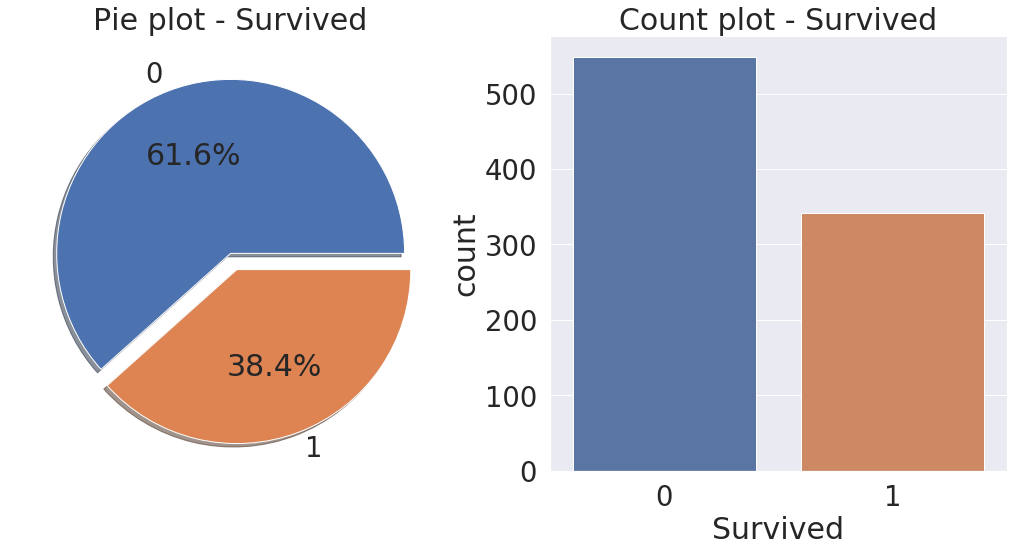

In [34]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

슬프게도 61.6%의 승객이 죽었고, 38.4%만이 살아남았다.

이렇게 target label을 확인해줌으로써 test 데이터를 통한 예측과의 비교에 어느정도 도움이 될 수 있을 듯 하다.

<div align="right">[목차로](#0)</div>
<a id="14"></a> <br>
### 4-2. Pclass
Pclass 변수에 대해 확인해보도록 하자.<br>
Pclass는 서수형 데이터이다. (서수형 : 카테고리화 되어있고 순서가 있다.)

생존과 Pclass에 대한 분석을 실시한다.

In [35]:
# Pclass별 승객 수 확인
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [36]:
# Pclass별 생존한 승객 수 확인
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [37]:
# 위 두 과정을 합친 결과
pd.crosstab(train['Pclass'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


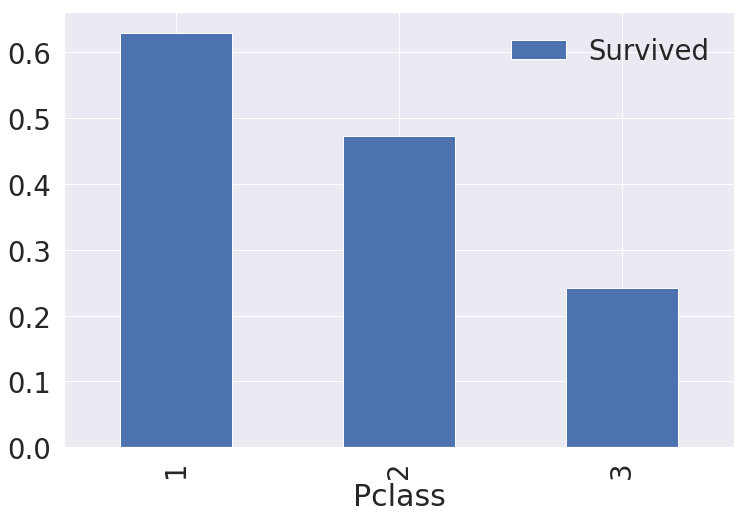

In [38]:
# 각 클래스별 생존 확률 도표화
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

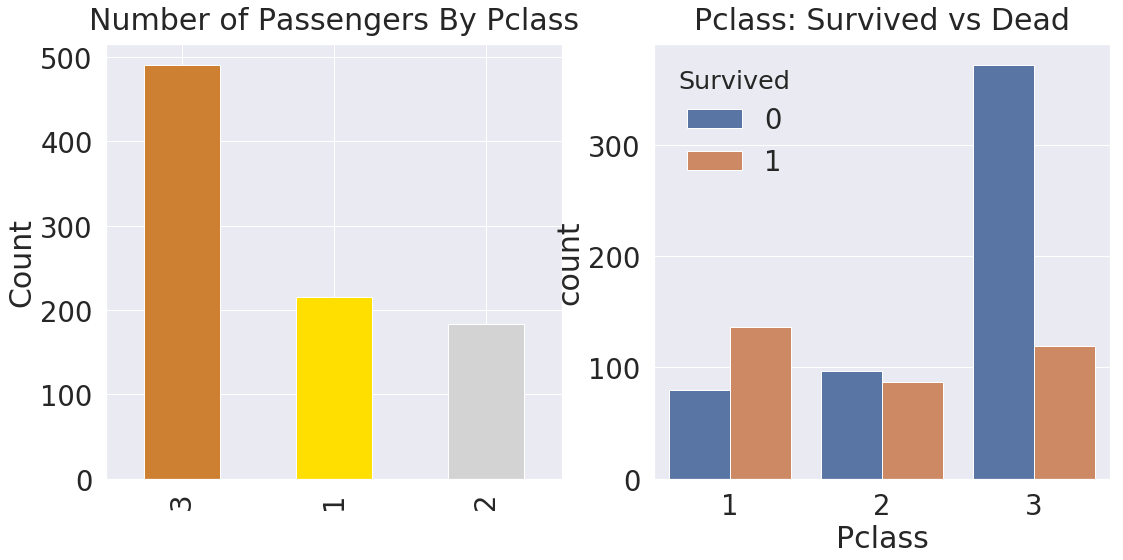

In [39]:
# 위 결과들을 종합하여 보자.

y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

분석 결과, 클래스가 높을수록 생존률이 높다는 것을 볼 수 있다.

<div align="right">[목차로](#0)</div>
<a id="15"></a> <br>
### 4-3. Sex
Sex 변수에 대해 확인해보도록 하자.<br>

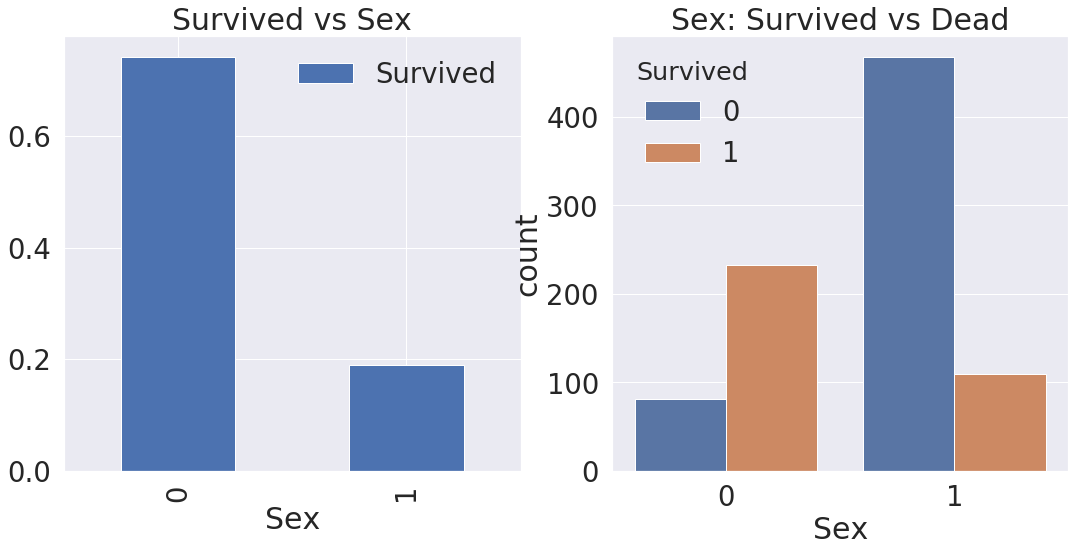

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [41]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [42]:
pd.crosstab(train['Sex'], train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
0,81,233,314
1,468,109,577
All,549,342,891


분석한 결과, 여자가 더 생존할 확률이 높다는 것을 볼 수 있었다.

이번에는 Sex와 Pclass 두 변수에 따라 생존이 어떻게 달라지는지 보자.

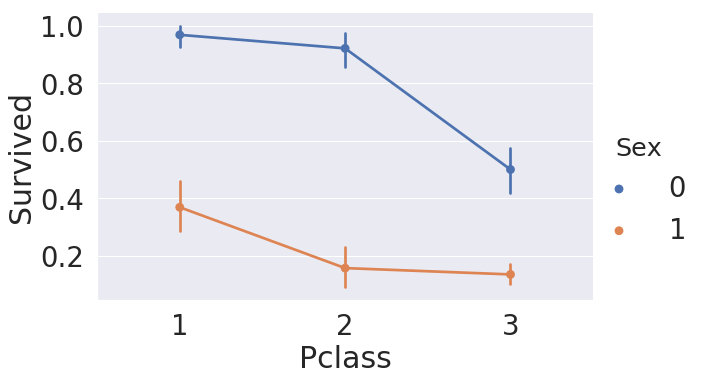

In [43]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, 
               size=6, aspect=1.5)

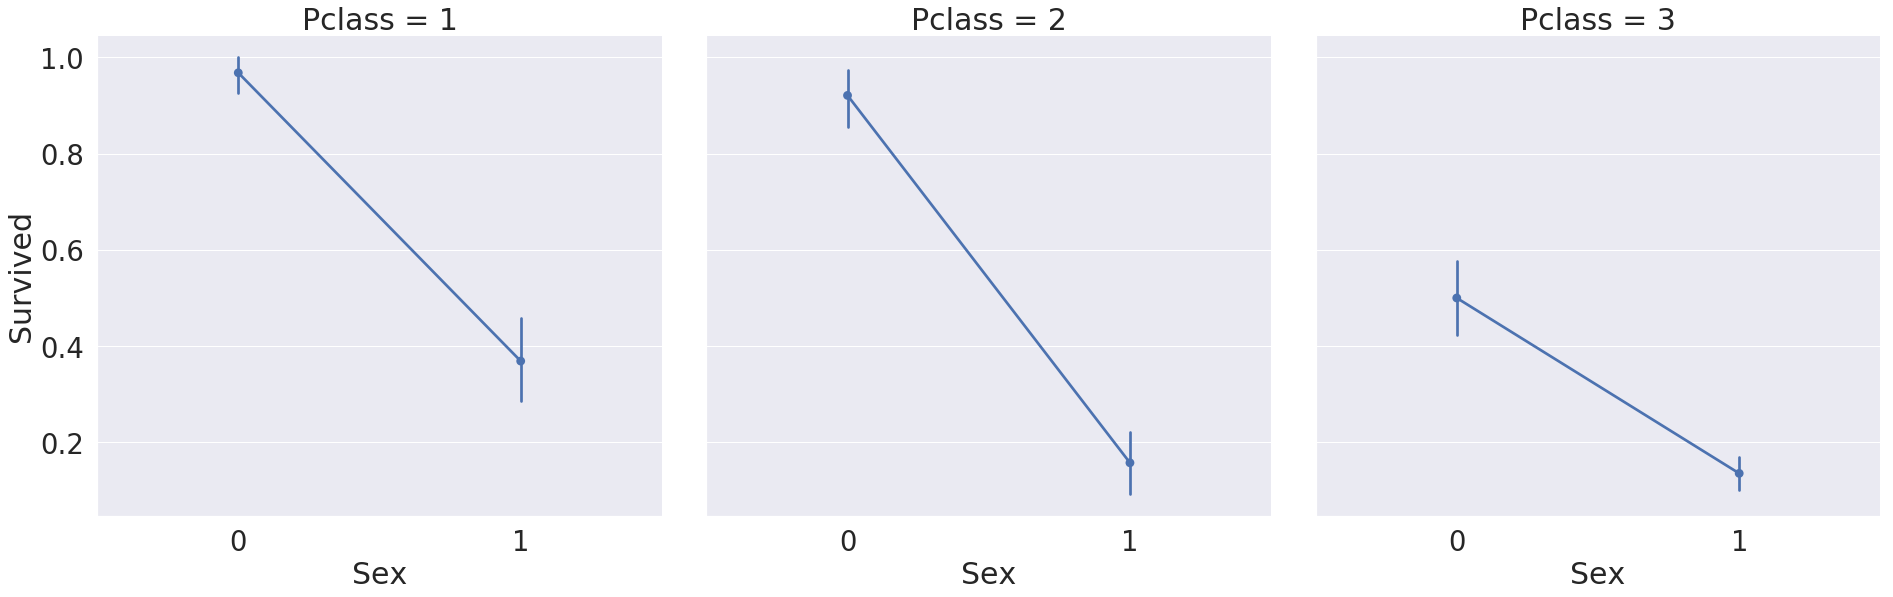

In [44]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=train, satureation=.5, size=9, aspect=1)

위 결과에 따르면 모든 클래스에서 여자(0)가 생존할 확률이 남자(1)보다 높은 것을 알 수 있다.

<div align="right">[목차로](#0)</div>
<a id="16"></a> <br>
### 4-4. Age
Age 변수에 대해 확인해보도록 하자.<br>

In [45]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.8 Years


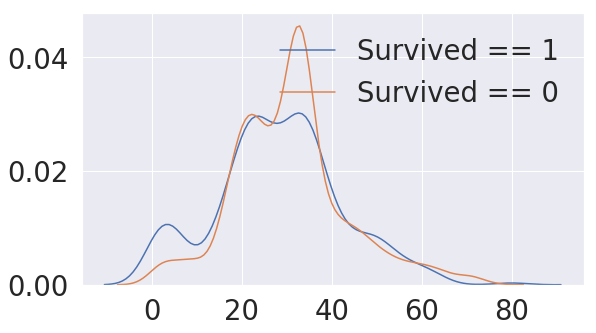

In [46]:
# Age에 따른 히스토그램
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

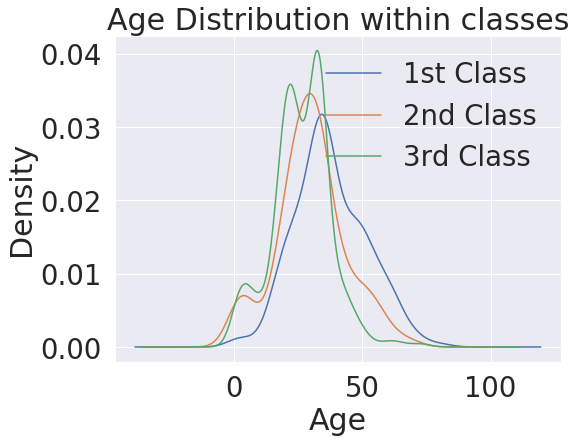

In [47]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

분석 결과,<br>
전체적으로 생존자는 나이가 어린 경우가 많으며,<br>
클래스가 높을수록 나이 많은 사람의 비중이 커지는 것을 볼 수 있다.

이번엔 나이대의 변화에 따른 생존률을 비교해보자.

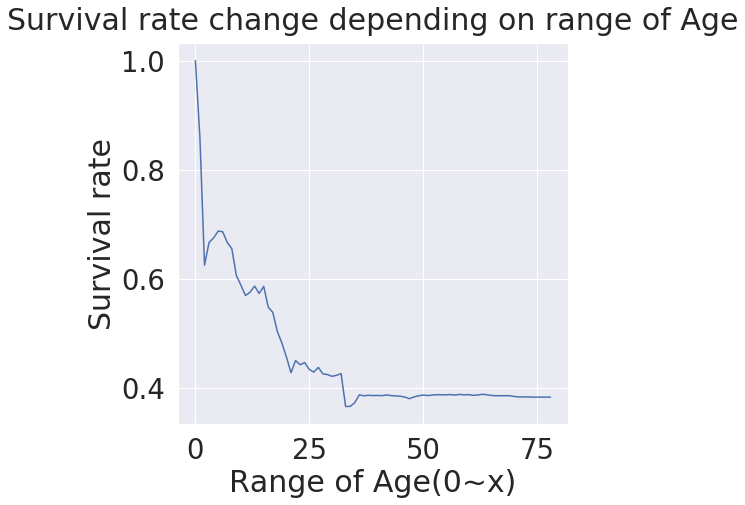

In [48]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

나이가 어릴수록 생존률이 확실히 높다는 것을 확인할 수 있다.

이번에는 Sex, Pclass, Age, Survived 모두에 대한 분석을 보자.

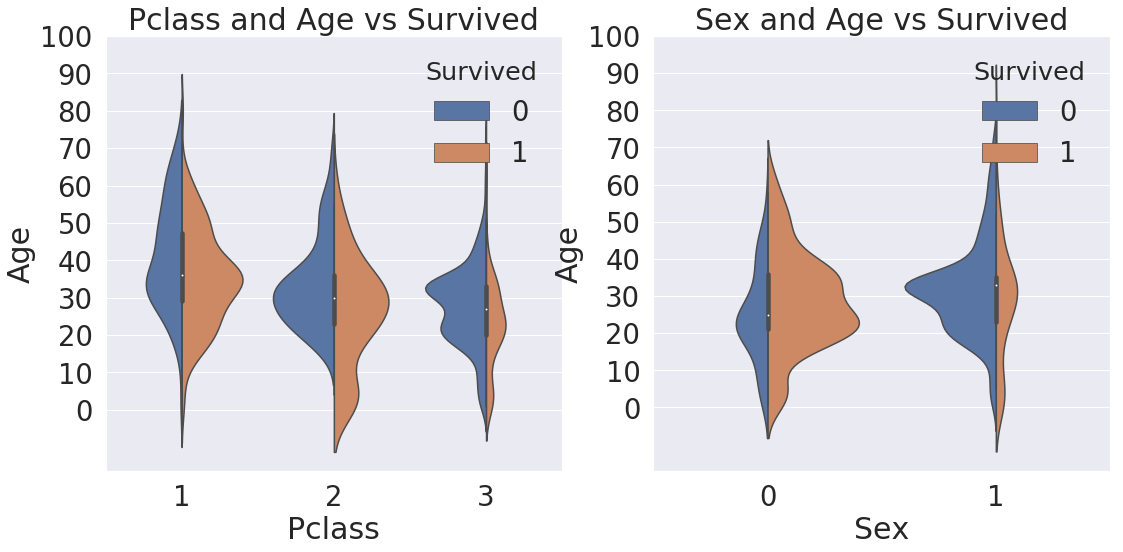

In [49]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

왼쪽 그림은 클래스 별로 나이의 분포와 생존 여부를 구분하는 그래프이다.

오른쪽 그림은 성별별로 생존에 따른 분포를 보여주는 그래프이다.

생존만 봤을 때는, 모든 클래스에서 나이가 어릴수록 생존률이 높으며,<br>
특히 오른쪽 그림을 보면 여자(0)가 많이 생존함을 볼 수 있다.

여성과 아이를 먼저 살리려는 모습이 돋보인다.

In [50]:
# Age 분석이 끝났으니 변수는 지워버리자!

train.drop(['Age'], axis=1, inplace=True)
test.drop(['Age'], axis=1, inplace=True)

<div align="right">[목차로](#0)</div>
<a id="17"></a> <br>
### 4-5. Embarked
Embarked 변수에 대해 확인해보도록 하자.<br>

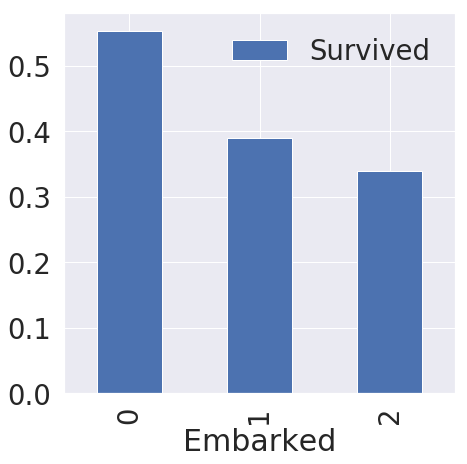

In [51]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

생존률은 전체적으로 비슷하나, C 클래스(0)가 좀 더 높은 것을 볼 수 있다.

이번엔 앞서 본 다른 변수와 비교해보도록 하자.

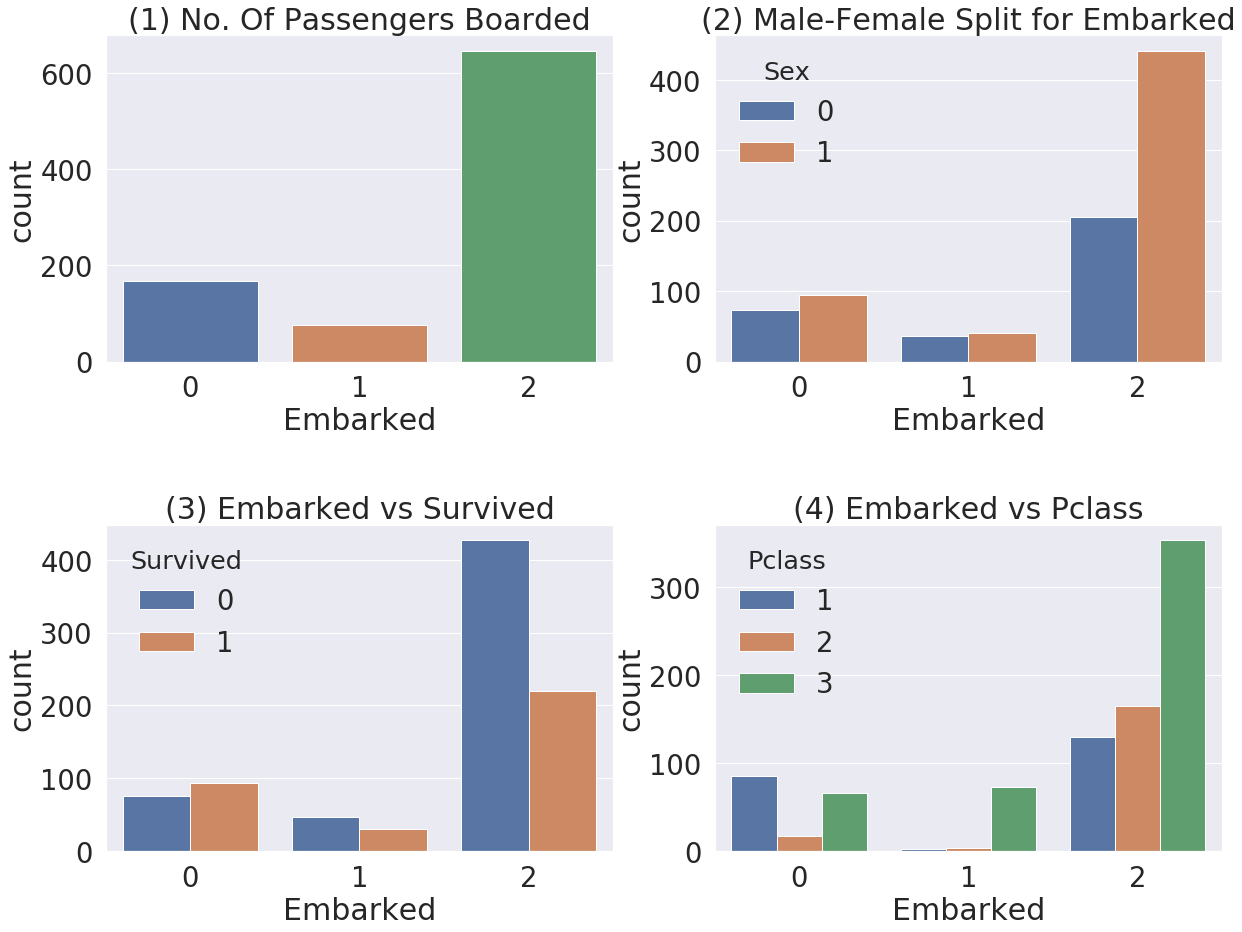

In [52]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure(1) - 전체적으로 봤을 때, S(1)에서 가장 많은 사람이 탑승했다.<br>
Figure(2) - C(0)와 Q(2) 는 남녀의 비율이 비슷하고, S(1)는 남자가 더 많다.<br>
Figure(3) - 생존확률이 S(1)일 경우 많이 낮은 걸 볼 수 있다.<br>
Figure(4) - C(0)가 생존확률이 높은 이유는 클래스가 높은 사람이 많이 타서. S(1)는 3rd class 가 많아서 생존확률이 낮게 나온다.

<div align="right">[목차로](#0)</div>
<a id="18"></a> <br>
### 4-6. FamilySize
FamilySize 변수에 대해 확인해보도록 하자.<br>

In [53]:
print("Maximum size of Family: ", train['FamilySize'].max())
print("Minimum size of Family: ", train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


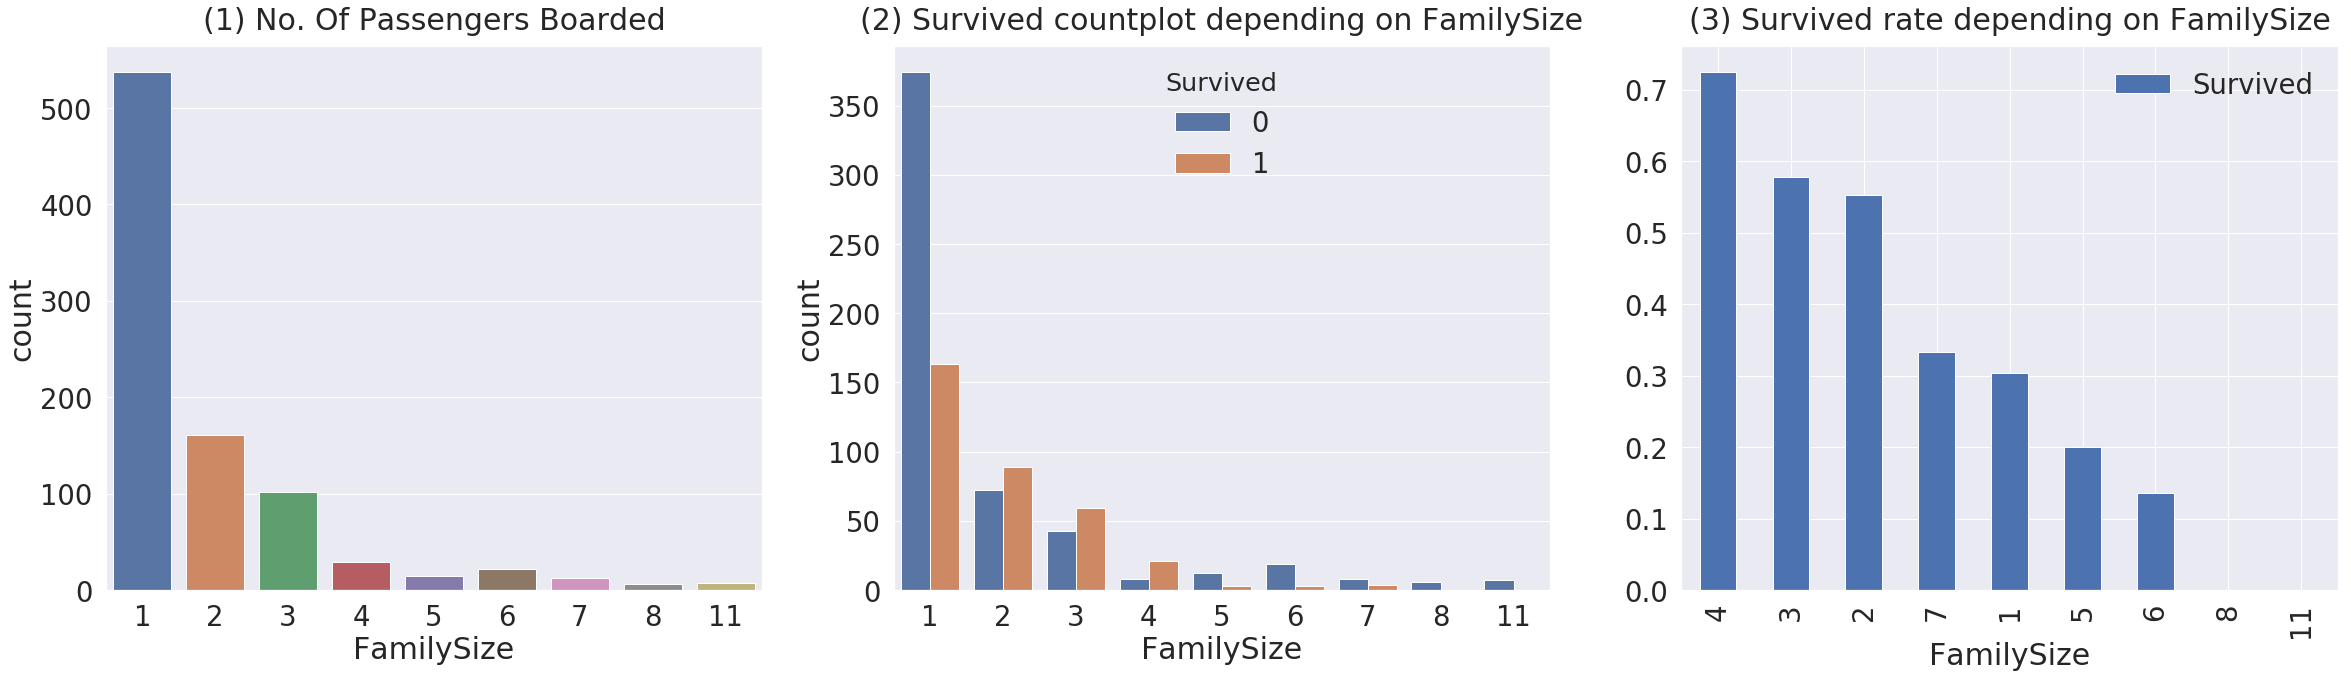

In [54]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Figure (1) - 가족크기가 1~11까지 있다. 대부분 1명이고 그 다음으로 2, 3, 4명.<br>
Figure (2), (3) - 가족 크기에 따른 생존비교. 가족이 4명인 경우가 가장 생존확률이 높다.<br>
가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지고, 가족수가 너무 작거나(1) 너무 커도(5, 6, 8, 11) 생존 확률이 작다.<br>
3~4명 선에서 생존확률이 높은 걸 확인할 수 있다.

<div align="right">[목차로](#0)</div>
<a id="19"></a> <br>
### 4-7. Fare
Fare 변수에 대해 확인해보도록 하자.<br>

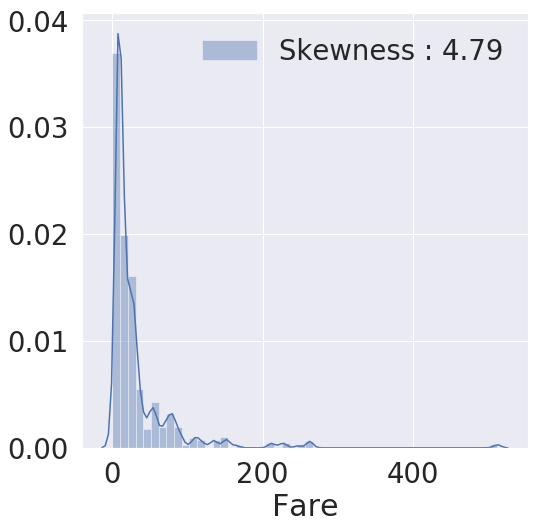

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

distribution이 매우 비대칭(high skewness).<br>
만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있다.

몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있다.<br>
outlier의 영향을 줄이기 위해 Fare 에 log 를 취하자.

In [56]:
train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

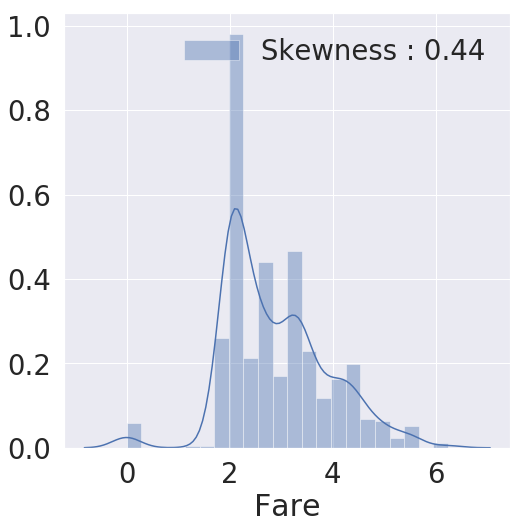

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

로그를 취해줌으로서 비대칭성이 많이 줄었다.

이처럼 로그 변환 또한 Feature Engineering에 속한다.

<div align="right">[목차로](#0)</div>
<a id="20"></a> <br>
### 4-8. 각 변수별 상관 관계 분석
지금까지 각 변수들에 대한 분석을 실행했다. (Cabin은 결측치가 너무 많아 제외.)

이제 마지막으로 각 변수들 간의 상관 관계를 히트맵으로 보도록 하자.

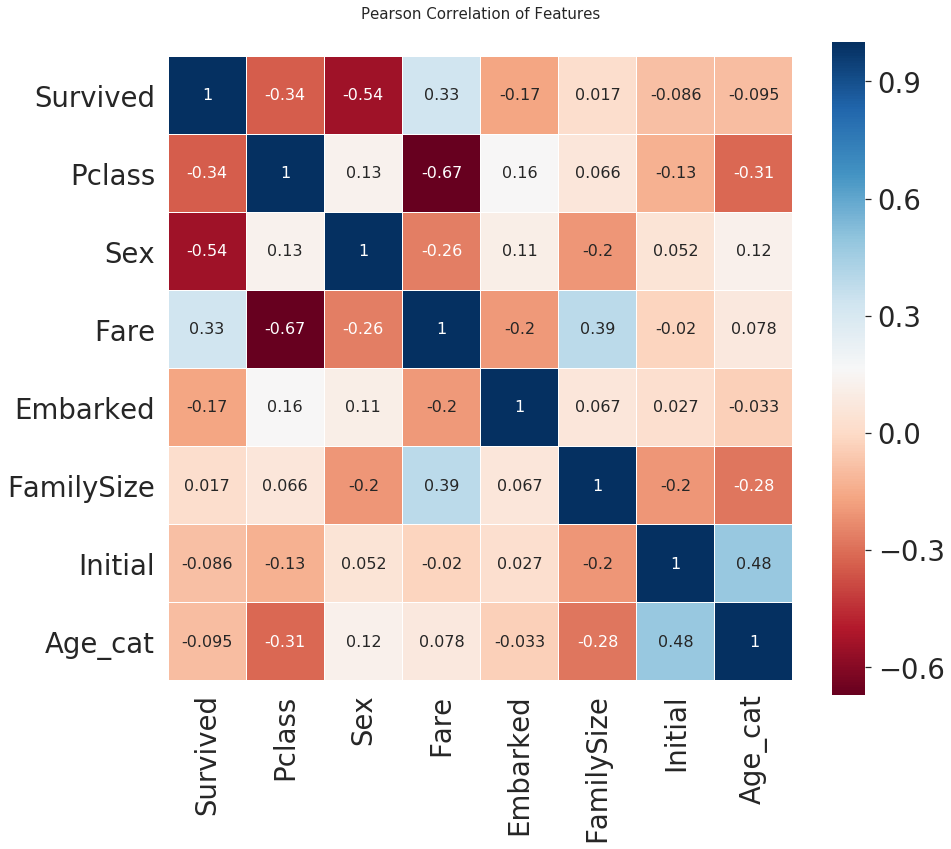

In [58]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

In [59]:
# 모든 분석이 끝났으니 원-핫 인코딩을 진행하자!

# Initial One-hot encoding
train = pd.get_dummies(train, columns=['Initial'], prefix='Initial')
test = pd.get_dummies(test, columns=['Initial'], prefix='Initial')

# Embarked One-hot encoding
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')
# Sex는 이미 0과 1로만 이루어져있으니 원핫인코딩 제외

In [60]:
# 최종 train 데이터 확인
train

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.564949,1,2,0,0,0,0,1,0,0,1
887,1,1,0,3.401197,1,1,0,1,0,0,0,0,0,1
888,0,3,0,3.154870,4,2,0,1,0,0,0,0,0,1
889,1,1,1,3.401197,1,2,0,0,1,0,0,1,0,0


In [61]:
# 최종 test 데이터 확인
test

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,2.085672,1,3,0,0,1,0,0,0,0,1
414,1,0,4.690430,1,3,0,0,1,0,0,1,0,0
415,3,1,1.981001,1,3,0,0,1,0,0,0,0,1
416,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="21"></a> <br>
# 5. 데이터 모델링
데이터 분석을 실행해보았다.<br>
이제 sklearn을 활용해 머신러닝 모델을 만들 것이다.

그 전에, 타이타닉 문제의 본질로 다시 돌아가자.

타이타닉 문제는<br>
target class(survived)가 있으며,<br>
target class 는 0, 1로 이루어져 있으므로(binary)<br>
<font color="red">binary classfication</font> 문제이다.

우리가 지금 가진 train set 의 survived를 제외한 input 으로 모델을 최적화시켜서<br>
각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어낸다.<br>
그 후 모델을 학습하지 않은 test set 을 input 으로 주어서<br>
test set 의 각 샘플(탑승객)의 생존 유무를 예측해볼 것이다.

<div align="right">[목차로](#0)</div>
<a id="22"></a> <br>
### 5-1. 훈련 데이터, 테스트 데이터, 검증 데이터 분리

In [62]:
X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values

In [63]:
X_tr, X_vld, y_tr, y_vld = model_selection.train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

<div align="right">[목차로](#0)</div>
<a id="23"></a> <br>
### 5-2. 모델링 - 랜덤포레스트

데이터를 분리하는 과정도 되게 간단하지만, 모델을 생성하여 예측하는 것 또한 간단하다.

In [64]:
model = ensemble.RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

겨우 3줄로 모델 객체를 만들고 학습시킨 후 예측값을 얻어보았다.

이번엔 모델의 성능을 보자.

In [65]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.96% 정확도로 생존을 맞춤


총 268명 중 83.21% 정확도로 생존을 맞춤

학습된 모델은 feature importance를 가진다.<br>
즉 어떤 feature에 얼마나 영향을 받았는지 확인할 필요가 있다.

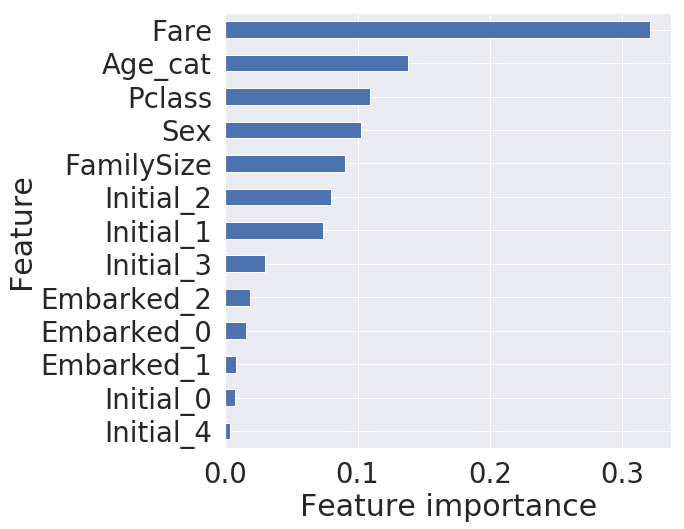

In [66]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

위 feature importance를 이용해,<br>
좀더 정확한 모델을 얻기 위한 feature selection이나 feature delete를 시행할 수 있다.

<div align="right">[목차로](#0)</div>

------------------------------------------------------------------------------------------------
<a id="24"></a> <br>
# 6. 검증, submission

데이터 모델링까지 끝났다.

이제 학습하지 않았던 테스트셋을 모델에 주입시켜 생존 여부를 예측해보자.<br>
이 결과는 실제로 submission 용이다.

앞서 gen_sub라는 이름으로 데이터를 불러왔다.

In [67]:
gen_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


예측 후 결과를 csv 파일로 저장해보자.

In [68]:
prediction = model.predict(X_test)
gen_sub['Survived'] = prediction
gen_sub.to_csv('./my_first_submission.csv', index=False)

이걸로 하나의 프로젝트가 끝이 났다.

위 과정은 수많은 과정 중 한개씩만 사용했기 때문에,<br>
앞으로는 좀 더 참신한 feature engineering과 modeling이 가능해야 한다.

고생하셨다.